In [1]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [2]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [3]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [4]:
mdl07=mdl[mdl['Server Name']=='CALBIPRD07']

<B>CALPBPRD07 RAM<B>

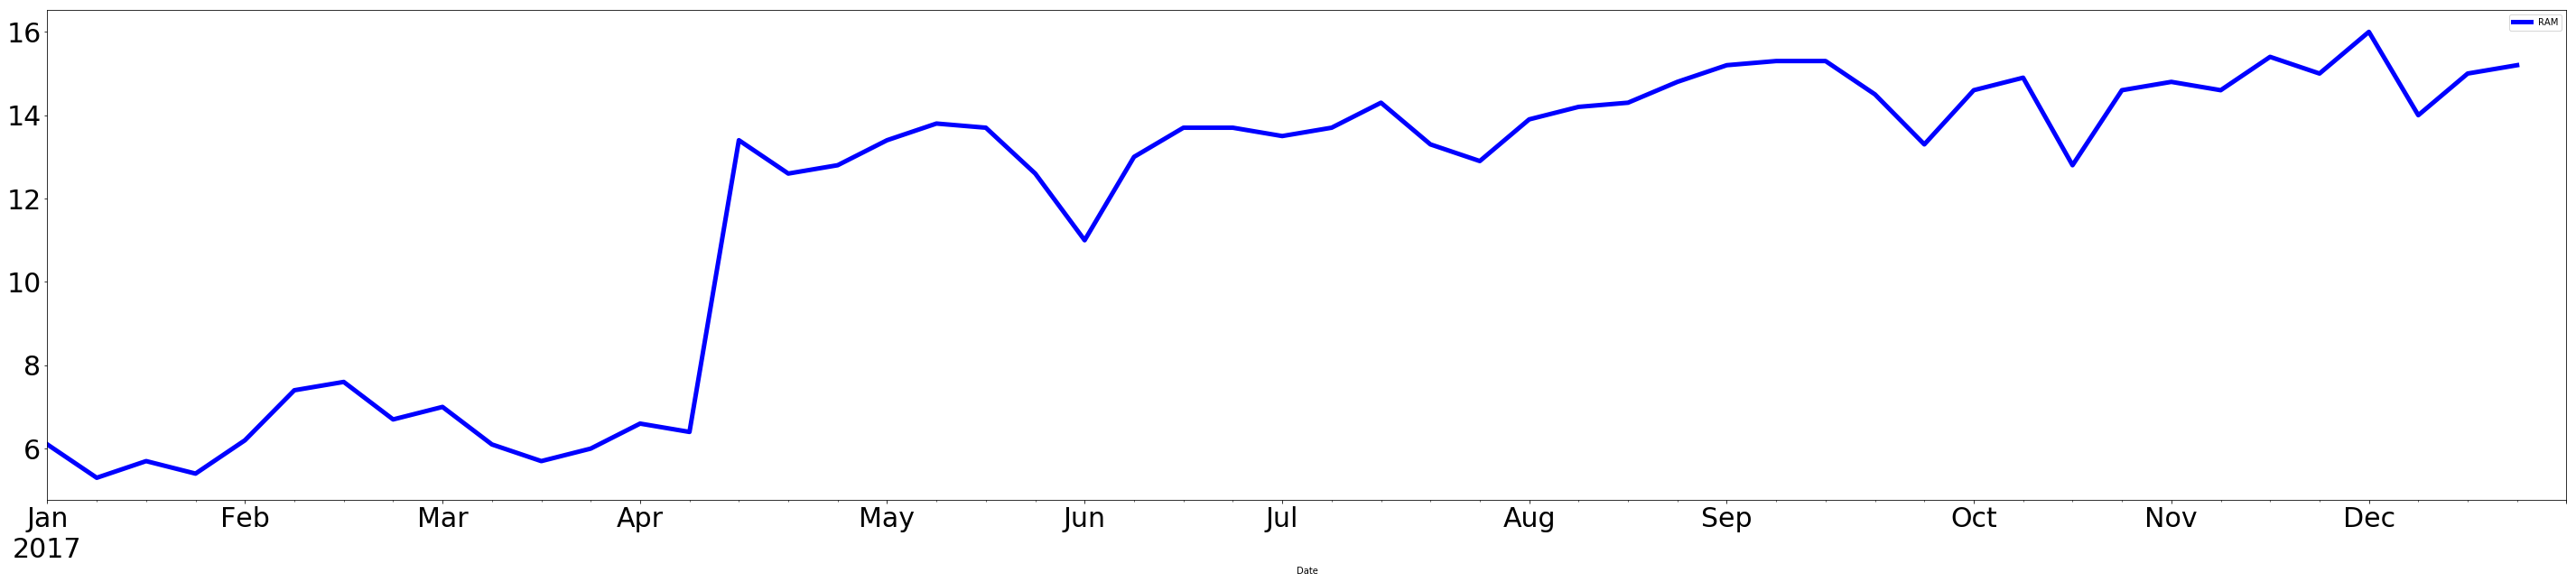

In [5]:
mdl07.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='RAM', color ='blue')

In [6]:
mdl07.set_index('Date', inplace=True)
mdl07['Month']= mdl07.index.month
mdl07['Day']=mdl07.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
mdl07.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD07,Wk 1,2.6700,6.1,1,7
2017-01-14,CALBIPRD07,Wk 2,0.1990,5.3,1,14
2017-01-21,CALBIPRD07,Wk 3,0.3300,5.7,1,21
2017-01-28,CALBIPRD07,Wk 4,0.1308,5.4,1,28
2017-02-04,CALBIPRD07,Wk 5,3.1200,6.2,2,4


<B>CALBIPRD07 RAM (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


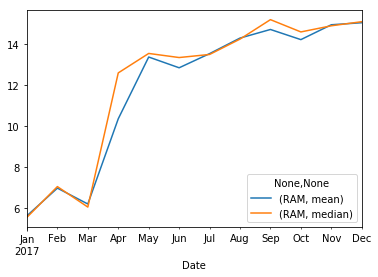

In [8]:
mdl07[['RAM']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for RAM - Week / Month Difference<b>

In [9]:
print 'CALBIPRD07 RAM Week Corr', mdl07['RAM'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD07 RAM Month Corr', mdl07['RAM'].resample('M').mean().autocorr(lag=1)

CALBIPRD07 RAM Week Corr 0.933566757535
CALBIPRD07 RAM Month Corr 0.908807745446


<b>Autocorrlation for RAM - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [10]:
print 'diff(!) lag =1 :', mdl07['RAM'].dropna().diff(1).dropna().autocorr(lag=1)
print 'diff(2) lag =1 :', mdl07['RAM'].dropna().diff(2).dropna().autocorr(lag=1)
print 'lag =1 :', mdl07['RAM'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl07['RAM'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl07['RAM'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl07['RAM'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl07['RAM'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl07['RAM'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl07['RAM'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl07['RAM'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl07['RAM'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl07['RAM'].dropna().autocorr(lag=34)

diff(!) lag =1 : -0.208410930205
diff(2) lag =1 : 0.338281654173
lag =1 : 0.933566757535
lag =2 : 0.891362049736
lag =3 : 0.854128825307
lag =4 : 0.803300435443
lag =5 : 0.755438238158
lag =6 : 0.720894872329
lag =7 : 0.706834628677
lag =12 : 0.616477107975
lag =24 : 0.219044816821
lag =24 : -0.0567421992828


<b> CALBIPRD07 RAM Autocorrlation - Month Lag 1 to 11</b>

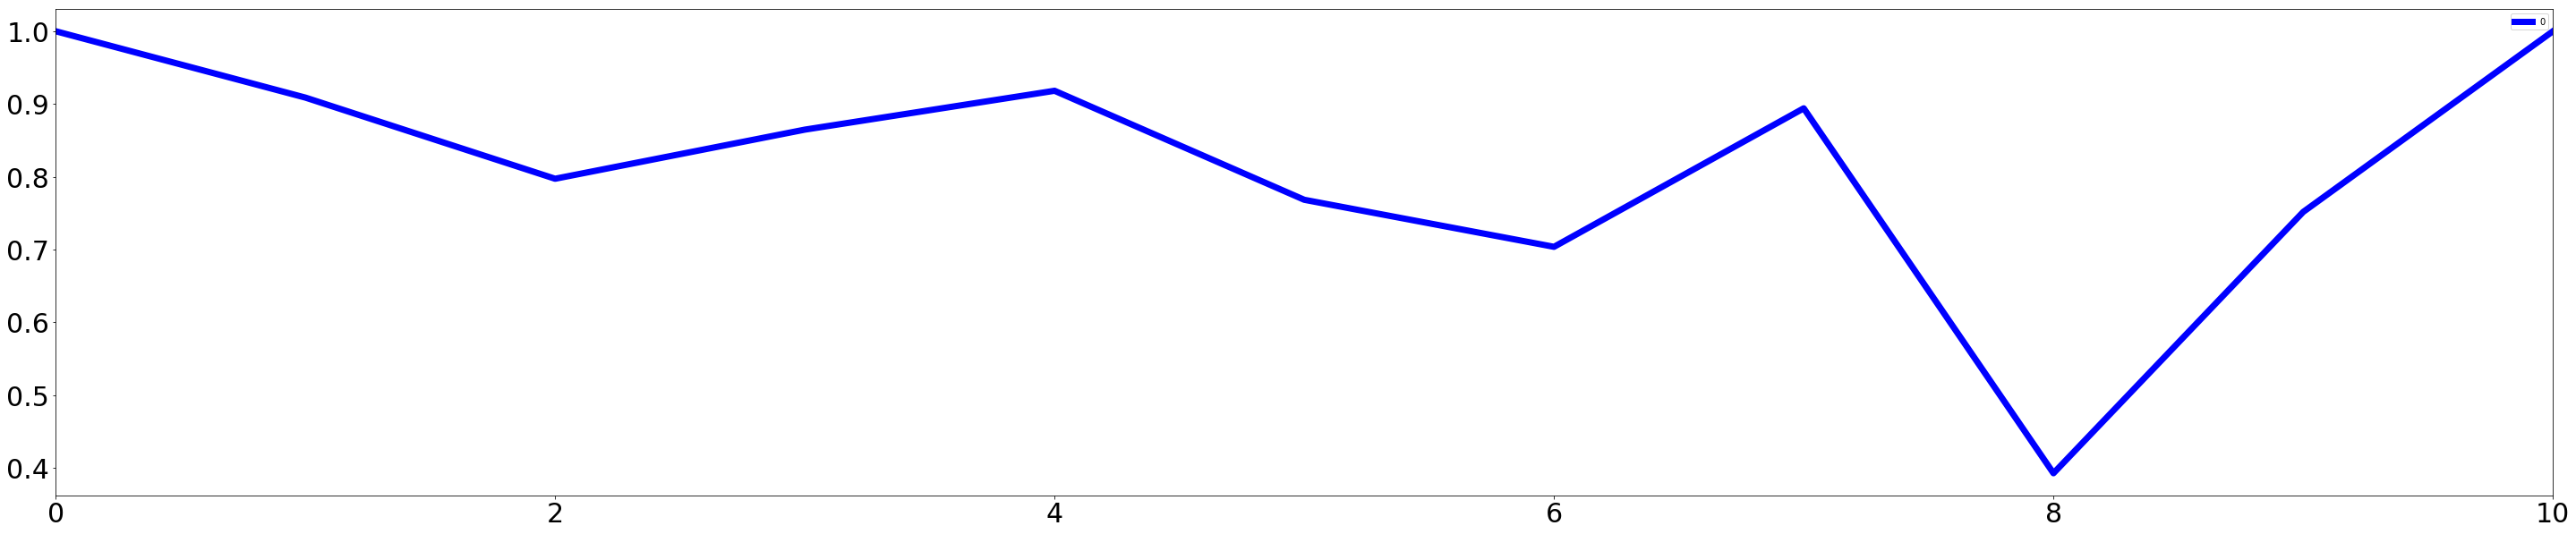

In [11]:
autoc = []

for i in range(11):
    autoc.append(mdl07['RAM'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> CALBIPRD07 RAM Autocorrlation - Week Lag 1 to 51</b>

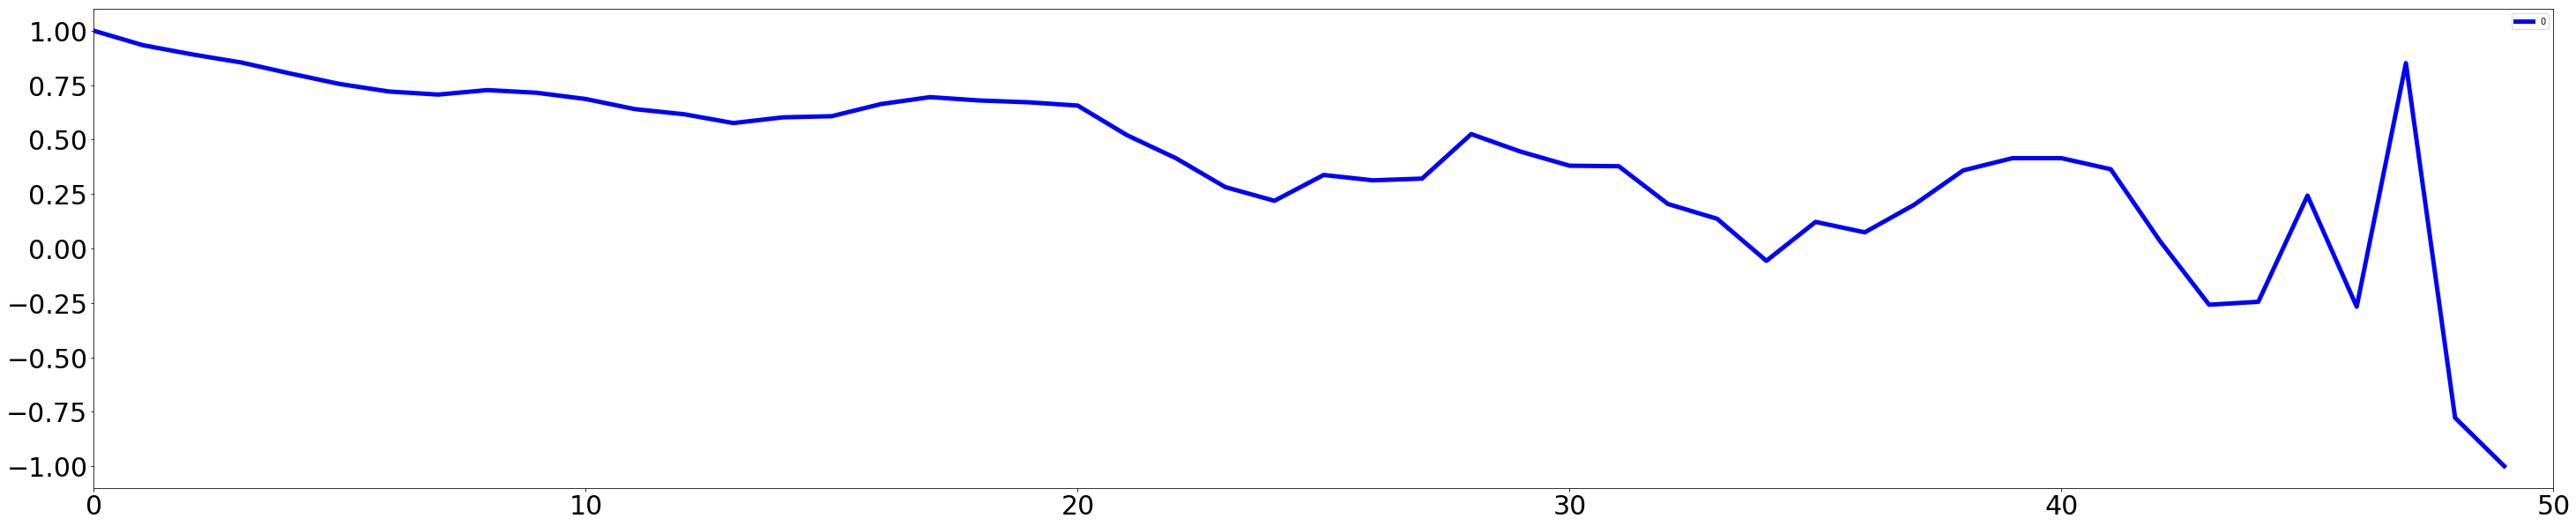

In [13]:
autoc = []

for i in range(51):
    autoc.append(mdl07['RAM'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


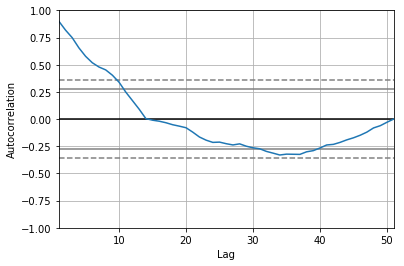

In [14]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl07['RAM'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


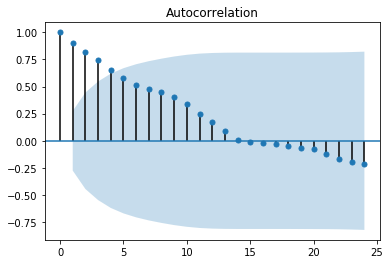

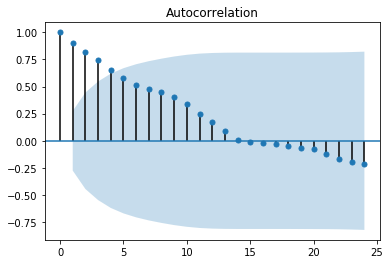

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdl07['RAM'].dropna().diff(1).dropna(),lags=24) 
plot_acf(mdl07['RAM'].dropna(),lags=24) 

<b> Trend has been observed  as non-stationary, 'diff' of 1 used to make it stationary </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation (0.933566757535) for lag 1,</font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

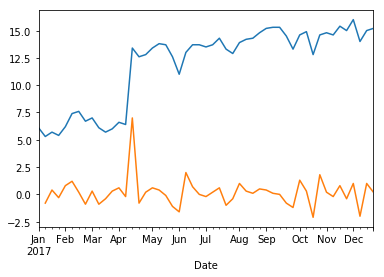

In [16]:
mdl07['RAM'].dropna().plot()
mdl07['RAM'].dropna().diff(1).dropna().plot()

In [20]:
from statsmodels.tsa.arima_model import ARMA

mdl07a = mdl07[['RAM']].dropna().diff(1).dropna().astype(float)
#mdl07a = mdl07[['RAM']].dropna().astype(float)
modela = ARMA(mdl07a, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 -82.749
Method:                       css-mle   S.D. of innovations              1.266
Date:                Sat, 06 Jan 2018   AIC                            171.498
Time:                        21:09:06   BIC                            177.235
Sample:                    01-14-2017   HQIC                           173.683
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1853      0.149      1.244      0.220      -0.107       0.477
ar.L1.RAM     -0.2055      0.138     -1.493      0.142      -0.475       0.064
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.8663           +0.0000j            4.8663            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'RAM' coef is 0.8957 which is high and P <.05, so 'diff' 1 used to make it stationary and P value is < .05 which is significant.</br>
<br> <font color ='red'>1. When diff =0 AR coef is 0.9428 and autocorrelation at lag 1 with diff(0) is 0.933566757535 and P 0.000 < .05 </font> </br>
<br><font color ='red'> 2. When diff =1 AR coef is -0.2055 and autocorrelation at lag 1 with diff(1) is -0.208410930205 and P 0.142 >.05</font> 
</br> 


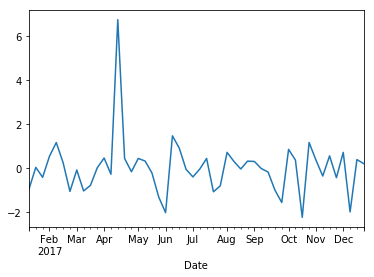

In [22]:
modela.resid.plot()

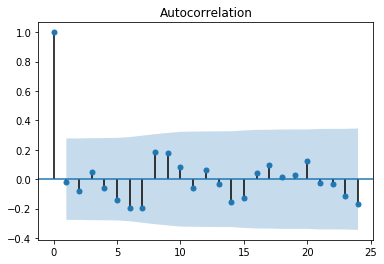

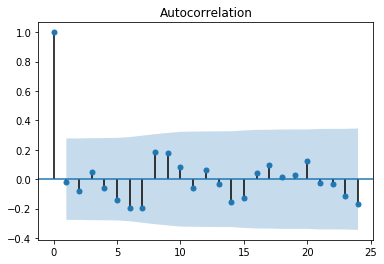

In [23]:
plot_acf(modela.resid, lags=24)

In [24]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [25]:
#mdl07m = mdl07[['RAM']].dropna().diff(1).dropna().astype(float)
mdl07m = mdl07[['RAM']].dropna().astype(float)
modelm = ARMA(mdl07m, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                -115.526
Method:                       css-mle   S.D. of innovations              2.312
Date:                Sat, 06 Jan 2018   AIC                            237.052
Time:                        21:10:51   BIC                            242.848
Sample:                    01-07-2017   HQIC                           239.267
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8841      0.564     21.078      0.000      10.779      12.989
ma.L1.RAM      0.7565      0.066     11.472      0.000       0.627       0.886
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3219           +0.0000j            1.3219            0.5000
-----------------------------------------------------------------------------
"""

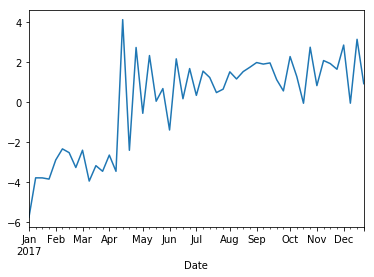

In [26]:
modelm.resid.plot()

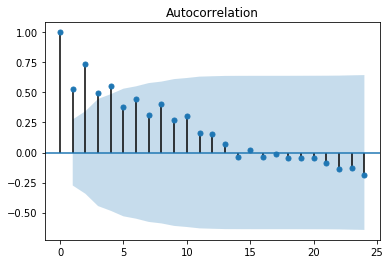

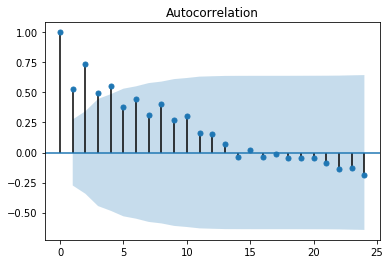

In [27]:
plot_acf(modelm.resid, lags=24)

<b>Ask ARMA(0,1) how to predict</b>

<b>ARIMA</b>

In [29]:
from statsmodels.tsa.arima_model import ARIMA
mdl07 = mdl07[['RAM']].dropna().astype(float)
model = ARIMA(mdl07, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RAM   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -82.749
Method:                       css-mle   S.D. of innovations              1.266
Date:                Sat, 06 Jan 2018   AIC                            171.498
Time:                        21:11:33   BIC                            177.235
Sample:                    01-14-2017   HQIC                           173.683
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1853      0.149      1.244      0.220      -0.107       0.477
ar.L1.D.RAM    -0.2055      0.138     -1.493      0.142      -0.475       0.064
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.8663           +0.0000j            4.8663            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
mdl07['RAM'].dropna().diff(1).dropna().autocorr(1)
#mdl06['RAM'].dropna().autocorr(1)

-0.20841093020518736

<b>Note:</b>
<br><font color ='red'>From ARIMA (1,1,0) coef is -0.2055 and diff(1).autocorr(1) is -0.208410 which is not same <b>what it indicates,</b> P value is 0.142 > .05 which is not significate </font></br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


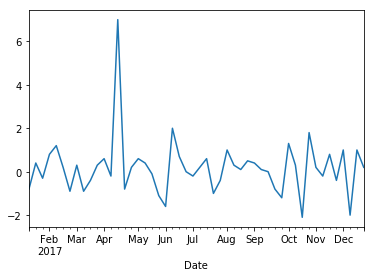

In [31]:
#model.resid.plot()
mdl07['RAM'].dropna().diff(1).dropna().plot()

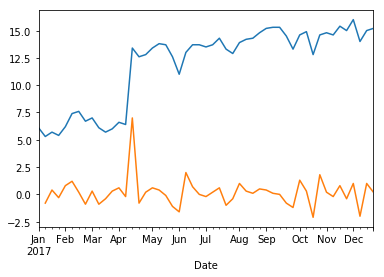

In [32]:
mdl07['RAM'].dropna().plot()
mdl07['RAM'].dropna().diff(1).dropna().plot()

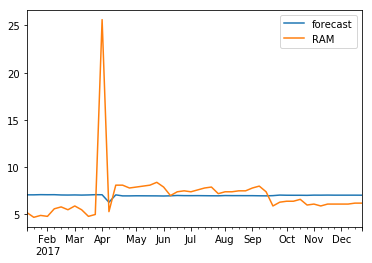

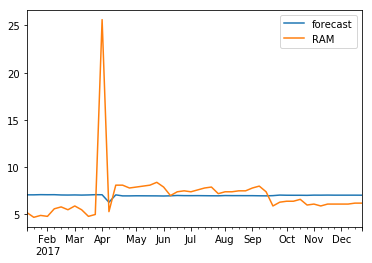

In [42]:
model.plot_predict(1, 50)

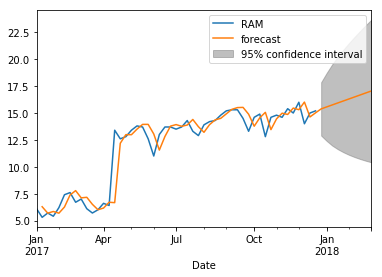

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl07['RAM'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Predit from AR(1) model</b>

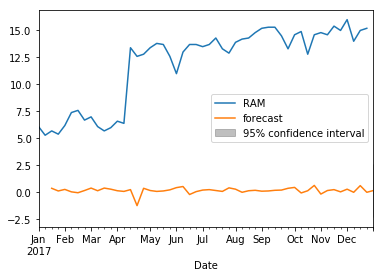

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl07['RAM'].dropna().plot(ax=ax)
fig = modela.plot_predict(1,50, ax=ax, plot_insample=False)

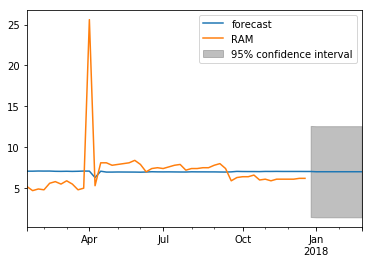

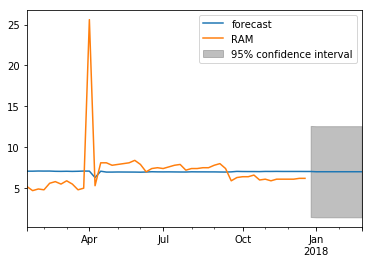

In [46]:
modela.plot_predict(1, 60)